In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
np.random.seed(3)
X, Y = datasets.make_blobs(n_samples=1000, n_features=2, center_box=(0, 10))
X = np.vstack((X[Y==0], X[Y==1]))
Y = np.hstack((Y[Y==0], Y[Y==1]))

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

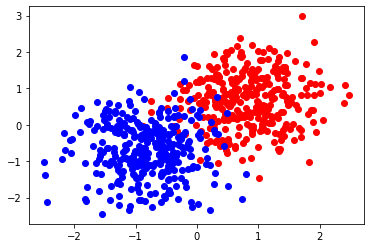

In [4]:
#Plot all data
plt.scatter(X[Y==0][:,0], X[Y==0][:,1], c="r")
plt.scatter(X[Y==1][:,0], X[Y==1][:,1], c="b")
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val, Y_val, test_size=0.5)

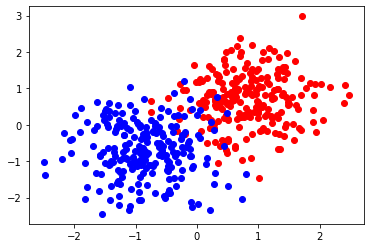

In [6]:
#Plot all training data
plt.scatter(X_train[Y_train==0][:,0], X_train[Y_train==0][:,1], c="r")
plt.scatter(X_train[Y_train==1][:,0], X_train[Y_train==1][:,1], c="b")
plt.show()

In [7]:
import sys
sys.path.append('../../')
import keras.keras as keras

In [8]:
model = keras.models.Sequential([
    keras.layers.Dense(2),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid"),
])

In [9]:
model.compile(learning_rate=0.1, loss="binary_crossentropy", optimizer="adam")

In [10]:
X_train.T.shape

(2, 466)

In [11]:
model.fit(X_train.T, Y_train.reshape(1,-1), X_val.T, Y_val, epochs=60)

Training loss: 0.11584785884626338
Validation loss: 0.1429994043915329


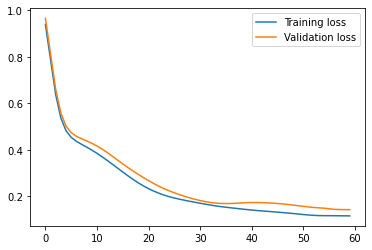

In [12]:
plt.plot(range(len(model.history["train_loss"])), model.history["train_loss"], label="Training loss")
plt.plot(range(len(model.history["val_loss"])), model.history["val_loss"], label="Validation loss")

plt.legend()

print("Training loss:", model.history["train_loss"][-1])
print("Validation loss:", model.history["val_loss"][-1])

plt.show()


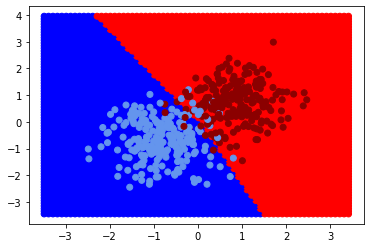

In [13]:
import matplotlib

x1 = np.arange(min(X_train[:,0])-1, max(X_train[:, 0]) +1 , 0.1)
x2 = np.arange(min(X_train[:,1])-1, max(X_train[:, 1]) +1 , 0.1)
xx1, xx2 = np.meshgrid(x1, x2)
xx1 = np.ravel(xx1)
xx2 = np.ravel(xx2)
x = np.vstack((xx1, xx2))
y = model.predict(x)
y = np.where(y<0.5, 0, 1).reshape(-1)

colors = ["red", "blue"]

plt.scatter(xx1, xx2, c=y, cmap=matplotlib.colors.ListedColormap(colors))

colors = ["darkred", "cornflowerblue"]
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=matplotlib.colors.ListedColormap(colors))

plt.show()